## Project Statement - Credit Card Customer Segmentation

#### Background: 
AllLife Bank wants to focus on its credit card customer base in the next financial year. They have been advised by their marketing research team, that the penetration in the market can be improved. Based on this input, the Marketing team proposes to run personalised campaigns to target new customers as well as upsell to existing customers. Another insight from the market research was that the customers perceive the support services of the back poorly. Based on this, the Operations team wants to upgrade the service delivery model, to ensure that customers queries are resolved faster. Head of Marketing and Head of Delivery both decide to reach out to the Data Science team for help.

#### Objective: 
To identify different segments in the existing customer based on their spending patterns as well as past interaction with the bank.

#### Key Questions:
- How many different segments of customers are there?
- How are these segments different from each other?
- What are your recommendations to the bank on how to better market to and service these customers?
 
#### Data Description: 
Data is of various customers of a bank with their credit limit, the total number of credit cards the customer has, and different channels through which customer has contacted the bank for any queries, different channels include visiting the bank, online and through a call.

#### Customer key - Identifier for the customer
- Average Credit Limit - Average credit limit across all the credit cards
- Total credit cards - Total number of credit cards
- Total visits bank - Total number of bank visits
- Total visits online - total number of online visits
- Total calls made - Total number of calls made by the customer
 
 
 
##### Alex N Waithera - Project 5 : Unsupervised Learning

### Exploratory Data Analysis (EDA)

In [471]:
#Import the libraries to use
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import copy
import seaborn as sns
%matplotlib inline
from sklearn.model_selection  import train_test_split
from sklearn.cluster import KMeans
from scipy.stats import zscore
from sklearn.decomposition import PCA

In [472]:
#Load and review data using pandas
df = pd.read_csv("Credit Card Customer Data1.csv")

df.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


In [473]:
# Display statistical summary of the dataset
df.describe()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
count,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000
mean,330.500000,55141.443939,34574.242424,4.706061,2.403030,2.606061,3.583333
std,190.669872,25627.772200,37625.487804,2.167835,1.631813,2.935724,2.865317
min,1.000000,11265.000000,3000.000000,1.000000,0.000000,0.000000,0.000000
25%,165.750000,33825.250000,10000.000000,3.000000,1.000000,1.000000,1.000000
50%,330.500000,53874.500000,18000.000000,5.000000,2.000000,2.000000,3.000000
75%,495.250000,77202.500000,48000.000000,6.000000,4.000000,4.000000,5.000000
max,660.000000,99843.000000,200000.000000,10.000000,5.000000,15.000000,10.000000


####  Observation:
- The dataset has about 660 entries and seven(7) variables.
- All of the seven(7) columns are numerical.
- Based on the problem statement, the objective of this project is to identify different segments in the existing customer based on their spending patterns as well as past interaction with the bank

In [474]:
# Display information and shape of the dataframe:  
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
Sl_No                  660 non-null int64
Customer Key           660 non-null int64
Avg_Credit_Limit       660 non-null int64
Total_Credit_Cards     660 non-null int64
Total_visits_bank      660 non-null int64
Total_visits_online    660 non-null int64
Total_calls_made       660 non-null int64
dtypes: int64(7)
memory usage: 36.2 KB


(660, 7)

In [475]:
# Check datatype
df.dtypes

Sl_No                  int64
Customer Key           int64
Avg_Credit_Limit       int64
Total_Credit_Cards     int64
Total_visits_bank      int64
Total_visits_online    int64
Total_calls_made       int64
dtype: object

In [476]:
# Print non-null number of the movings ratings data
df.count()
#Check for any null values in the dataset
df.isnull().values.any()

False

In [477]:
# count number of missing values in each column
# sum True's
df.isnull().sum()

Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

In [478]:
# Check the unique values in each column of the dataframe.
df.nunique()

Sl_No                  660
Customer Key           655
Avg_Credit_Limit       110
Total_Credit_Cards      10
Total_visits_bank        6
Total_visits_online     16
Total_calls_made        11
dtype: int64

In [479]:
#Check datatypes 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
Sl_No                  660 non-null int64
Customer Key           660 non-null int64
Avg_Credit_Limit       660 non-null int64
Total_Credit_Cards     660 non-null int64
Total_visits_bank      660 non-null int64
Total_visits_online    660 non-null int64
Total_calls_made       660 non-null int64
dtypes: int64(7)
memory usage: 36.2 KB


#### Observation: 
- The dataset has 660 rows and seven(7) columns. 
- The 660 entries are all int64 values.  
- This dataset does not have any missing values, null values or duplicates.

### Univariate Analysis

In [480]:
df.columns

Index(['Sl_No', 'Customer Key', 'Avg_Credit_Limit', 'Total_Credit_Cards',
       'Total_visits_bank', 'Total_visits_online', 'Total_calls_made'],
      dtype='object')

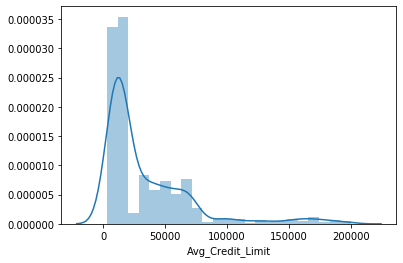

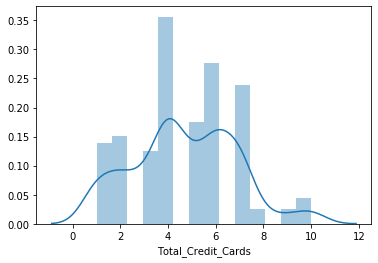

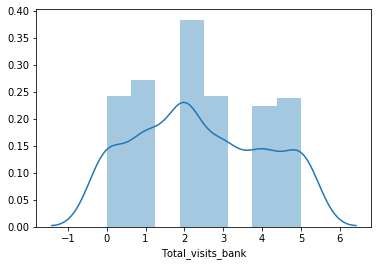

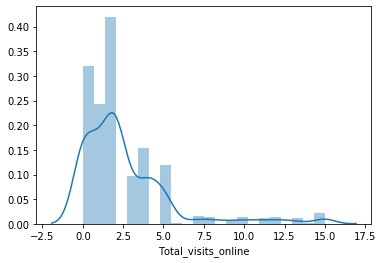

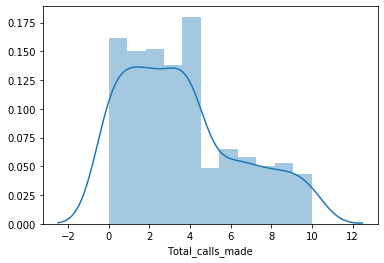

In [481]:
# Analyse data distribution in the continous variables using vizualization:  
for i in ['Avg_Credit_Limit','Total_Credit_Cards','Total_visits_bank', 'Total_visits_online', 'Total_calls_made']:
    sns.distplot(df[i])
    plt.show()

In [482]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Sl_No,660.0,330.500000,190.669872,1.0,165.75,330.5,495.25,660.0
Customer Key,660.0,55141.443939,25627.772200,11265.0,33825.25,53874.5,77202.50,99843.0
Avg_Credit_Limit,660.0,34574.242424,37625.487804,3000.0,10000.00,18000.0,48000.00,200000.0
Total_Credit_Cards,660.0,4.706061,2.167835,1.0,3.00,5.0,6.00,10.0
Total_visits_bank,660.0,2.403030,1.631813,0.0,1.00,2.0,4.00,5.0
Total_visits_online,660.0,2.606061,2.935724,0.0,1.00,2.0,4.00,15.0
Total_calls_made,660.0,3.583333,2.865317,0.0,1.00,3.0,5.00,10.0


## Observations


- The features: 'SI_No' & 'Customer Key' are unique IDs of the customers and will not be used in this analysis. These two features will be dropped from the analysis and hence their decriptive statistics are not useful for this analysis. 
- The feature 'Avg_Credit_Limit' is skewed to the right and has a few outliers that will be removed to remove this skewness. 
- The feature 'Total_Credit_Cards' has a normal distribution with no potential outliers. 
- The rest of the features 'Total_visits_bank', 'Total_visits_online' and 'Total_calls_made' are slightly skewed to the right, although no potential outliers that can affect this analysis. 

#### Outlier treatment using median imputation

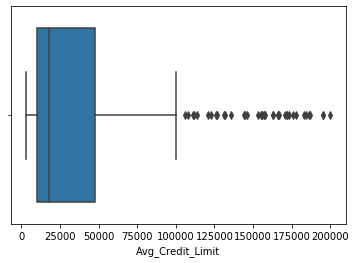

In [483]:
sns.boxplot(df['Avg_Credit_Limit'])

In [484]:
#Median imputation for outliers in 'Avg_Credit_Limit'
median_Avg_Credit_Limit = df['Avg_Credit_Limit'].median()

In [485]:
df["Avg_Credit_Limit"] = df["Avg_Credit_Limit"].mask(df["Avg_Credit_Limit"] >80000, median_Avg_Credit_Limit)

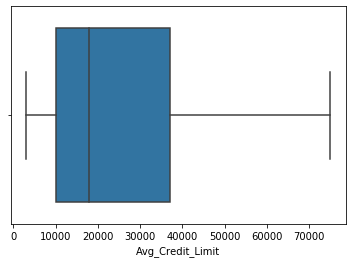

In [486]:
sns.boxplot(df['Avg_Credit_Limit'])

### Observation
- Using median imputation method, outliers present in the 'Avg_Credit_Limit' have been removed to reduce the skeweness of the data. From the above boxplot, it shows no outliers are present and hence this data is ready for further data exploration and analysis. 

## Data Scaling and Feature Engineering 
- The dataset is ready for pre-processing and feature engineering before we can apply unsupervised machine learning algorithms. Using Zscore will scale the dataset and will use PCA to reduce the noise in the data through dimensionality reduction. By using PCA we will reduce the sparsity in the dataset by separating the data into a series of components which comprises the majority of information or variance within the data. 

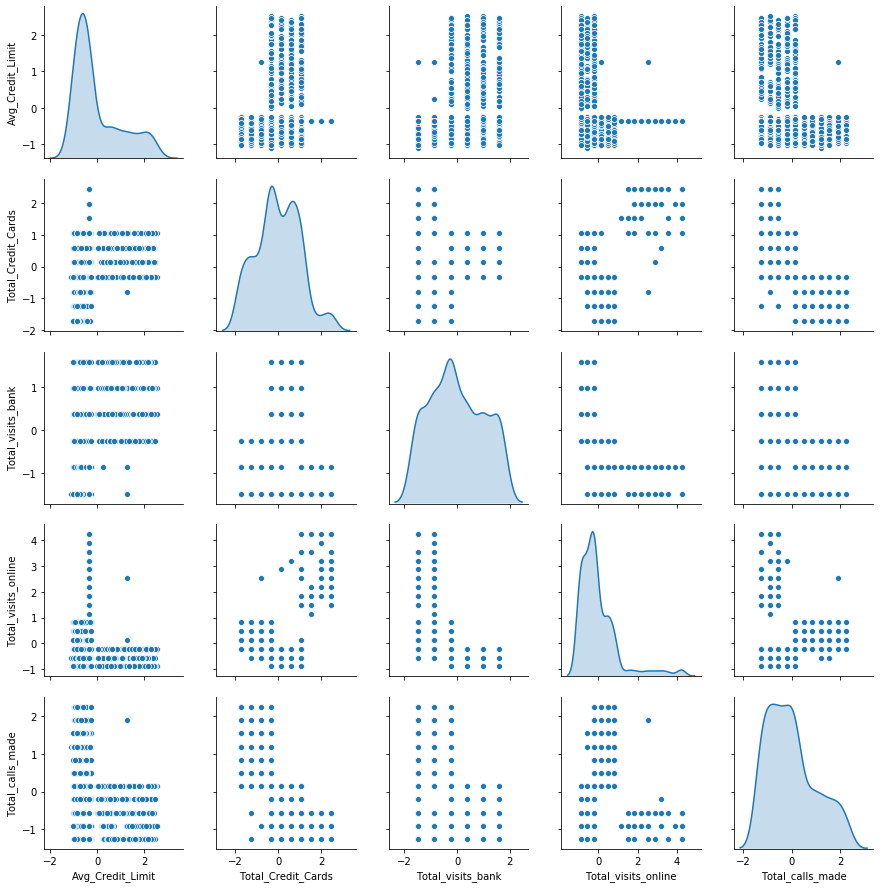

In [487]:
# The features: 'SI_No' & 'Customer Key' are unique IDs of the customers and will not be used in this analysis. 
# We will first select the features that we wish to use and then scale the dataset using zscores.  
df2 = df.iloc[:,2:]
df3 = df2.apply(zscore)
sns.pairplot(df3,diag_kind='kde')

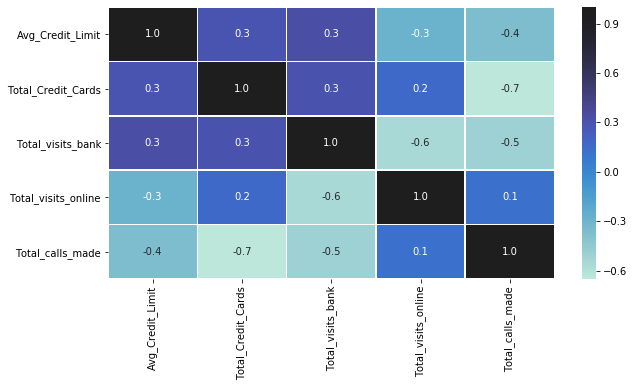

In [488]:
plt.figure(figsize=(10,5))
sns.heatmap(df3.corr(), annot=True, linewidths=.5, fmt= '.1f', center = 1 )  # heatmap
plt.show()

### Observations 
- The features: Total_calls_made & Total_Credit_Cards have a weak negative correlation.
- The features: Total_visits_bank & Total_calls_made have a weak negative correlation. 
- The features: Total_visits_online & Total_visits_bank have a weak negative correlation. 
- Already we can tell Total_calls_made & Total_visits_bank can be dropped from this analysis, but will conduct PCA to do feature extraction to create new dimensions that capture the most variance in the data reducing loss of information. 

### Principal Component Analysis (PCA)

- The PCA process will include the five(5) features in the dataframe (df3) that is already scaled. We will also compute the below covariance matrix of the selected features and hence compute the eigen values and eigen vectors of the covariance matrix. As a result, we will select the number of eigen values and corresponding eigen vectors that comprise at least 87% of the variance as captured below. 

In [489]:
# Compute the covariance matrix of the selected scaled data. 
covMatrix = np.cov(df3,rowvar=False)
print(covMatrix)

[[ 1.00151745  0.29313119  0.34025493 -0.28958196 -0.36033957]
 [ 0.29313119  1.00151745  0.31627526  0.16801286 -0.65223974]
 [ 0.34025493  0.31627526  1.00151745 -0.55269882 -0.50678371]
 [-0.28958196  0.16801286 -0.55269882  1.00151745  0.12749255]
 [-0.36033957 -0.65223974 -0.50678371  0.12749255  1.00151745]]


In [490]:
# We will select all the five (5) features that we wish to use in the dimensionality reduction. 
pca = PCA(n_components=5)
pca.fit(df3)

PCA(copy=True, iterated_power='auto', n_components=5, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [491]:
# The eigen Values
print(pca.explained_variance_)

[2.37364005 1.34256311 0.70913919 0.317897   0.26434791]


In [492]:
# The eigen Vectors
print(pca.components_)

[[-0.4219589  -0.42673909 -0.51863872  0.29520226  0.53264805]
 [-0.09309503  0.56511013 -0.28539545  0.71054113 -0.29268514]
 [ 0.88960563 -0.07885607 -0.38428332  0.10995905  0.2064434 ]
 [-0.069677   -0.33364337 -0.55161785 -0.26005759 -0.71548236]
 [ 0.13050265 -0.61725854  0.44453053  0.57294501 -0.27583977]]


In [493]:
# And the percentage of variation explained by each eigen Vector
print(pca.explained_variance_ratio_)

[0.47400873 0.26810578 0.14161295 0.06348307 0.05278948]


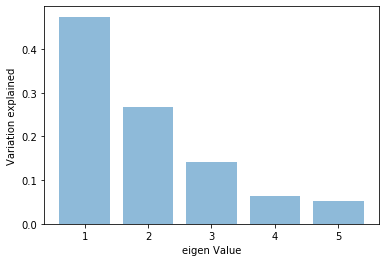

In [494]:
plt.bar(list(range(1,6)),pca.explained_variance_ratio_,alpha=0.5, align='center')
plt.ylabel('Variation explained')
plt.xlabel('eigen Value')
plt.show()

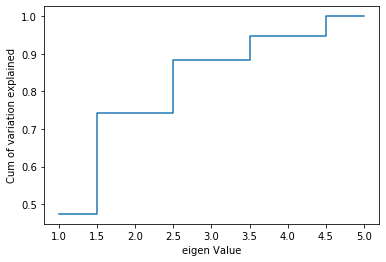

In [495]:
plt.step(list(range(1,6)),np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Cum of variation explained')
plt.xlabel('eigen Value')
plt.show()

### Dimensionality Reduction

From the graph above, it makes sense to reduce to the first three(3) highest dimensions that can explain 87% of the variation in the original data. 

In [496]:
pca3 = PCA(n_components=3)
pca3.fit(df3)
print(pca3.components_)
print(pca3.explained_variance_ratio_)
Xpca2 = pca3.transform(df3)

[[-0.4219589  -0.42673909 -0.51863872  0.29520226  0.53264805]
 [-0.09309503  0.56511013 -0.28539545  0.71054113 -0.29268514]
 [ 0.88960563 -0.07885607 -0.38428332  0.10995905  0.2064434 ]]
[0.47400873 0.26810578 0.14161295]


In [497]:
Xpca2

array([[ 0.30299849, -0.44957723, -0.20963659],
       [ 2.32225926,  1.09582159,  2.41338091],
       [-0.41841025,  0.77991469,  1.40918925],
       ...,
       [ 0.11208801,  2.95119091, -0.05608002],
       [ 0.13584135,  5.02846778,  0.02391363],
       [ 0.72108948,  4.01151914,  0.3277457 ]])

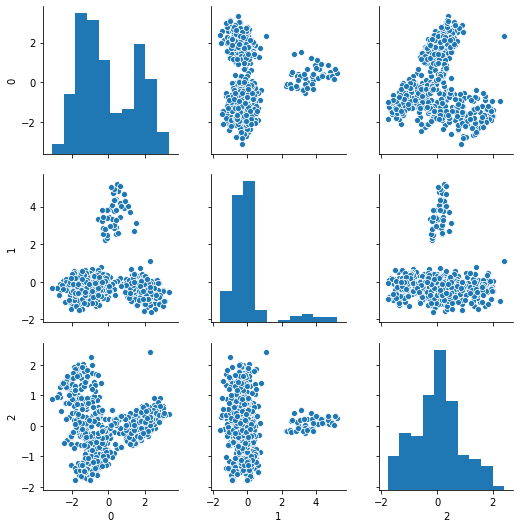

In [498]:
sns.pairplot(pd.DataFrame(Xpca2))

## Grouping credit customer data into similar clusters
Using K-means clustering we can group the data into different clusters based on their attributes. However, first we need to determine the optimal number of groups using the Elbow method as captured below: 

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

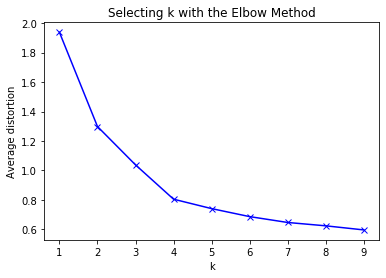

In [499]:
#Finding optimal no. of clusters
from scipy.spatial.distance import cdist
clusters=range(1,10)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(Xpca2)
    prediction=model.predict(Xpca2)
    meanDistortions.append(sum(np.min(cdist(Xpca2, model.cluster_centers_, 'euclidean'), axis=1)) / Xpca2.shape[0])


plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')

The elbow method determine k = 4 at the bend as shown above.

In [500]:
# When  K = 4
final_model=KMeans(4)
final_model.fit(Xpca2)
prediction=final_model.predict(Xpca2)
#Append the prediction 
df2["GROUP"] = prediction
dfXpca2 = pd.DataFrame(Xpca2)
dfXpca2["GROUP"] = prediction
print("Groups Assigned : \n")
df2.head()

Groups Assigned : 



,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,GROUP
0,18000,2,1,1,0,0
1,50000,3,0,10,9,1
2,50000,7,1,3,4,3
3,30000,5,1,1,4,0
4,18000,6,0,12,3,2


### Analyzing data distribution among the four groups (K = 4) using boxplots and pairplots. 

In [501]:
df2Clust = df2.groupby(['GROUP'])
df2Clust.mean()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
GROUP,,,,,
0,17267.857143,5.464286,3.638393,1.026786,1.937500
1,12174.107143,2.410714,0.933036,3.553571,6.870536
2,18000.000000,8.740000,0.600000,10.900000,1.080000
3,56111.111111,5.586420,3.283951,0.919753,2.086420


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B1D7248198>,
      dtype=object)

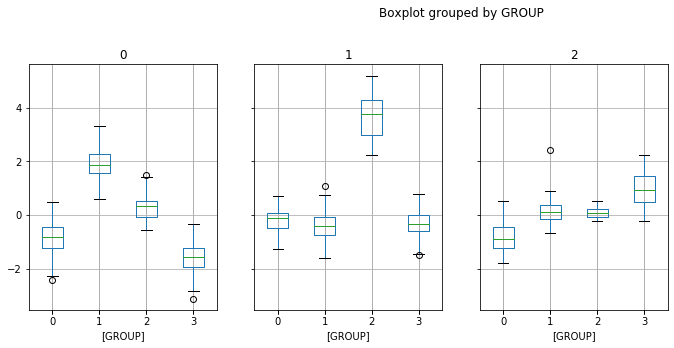

In [502]:
dfXpca2.boxplot(by='GROUP', layout = (2,4),figsize=(15,10))

In [503]:
dfXpca2['GROUP'].value_counts()

1    224
0    224
3    162
2     50
Name: GROUP, dtype: int64

### Observation 
Using K-means clustering when K = 4, the algorithm divides the dataset into four clusters which means four(4) different credit card customers that have different attributes based on Avg_Credit_Limit,Total_Credit_Cards, Total_visits_bank, Total_visits_online & Total_calls_made as explained by the four different clusters. The different clusters or groups named as 0, 1, 2, and 3 have different value counts namely: 224, 224, 50 and 162 respectively as shown above. 

On the other hand, the four different clusters or groups of credit card customers show some overlaps. All the four groups have overlaps within themselves meaning there are similarities within them. For instance, Group 1 lower percentile seem to overlap with upper percentile of group 2. Lower percentile of group 2 seem to overlap with upper percentile of group 3. Group 0 seem to overlap with all the other groups but slightly with group 1 at the whiskers of group 1. 

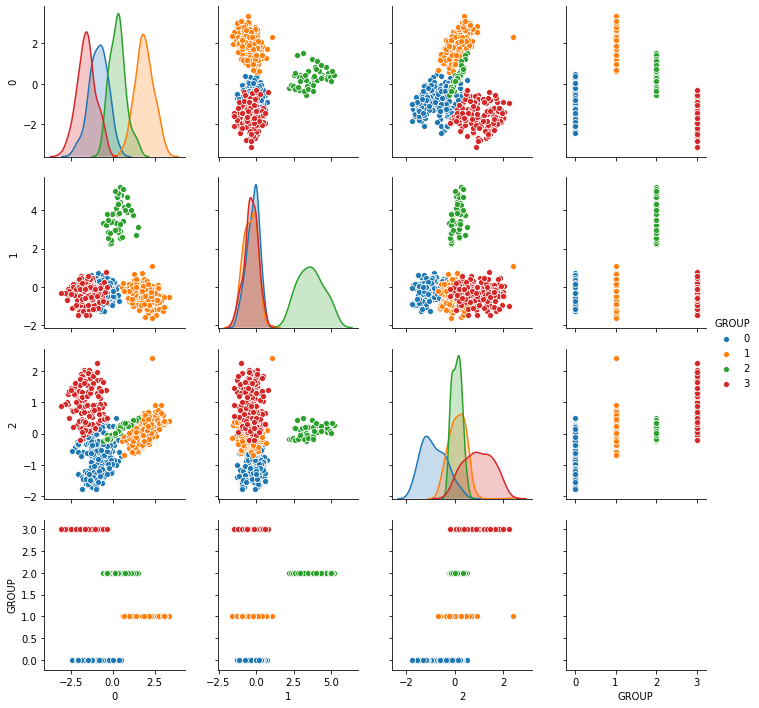

In [504]:
import seaborn as sns
sns.pairplot(dfXpca2, diag_kind='kde', hue='GROUP')

## Using hierarchical clustering (with different linkages) with the help of dendrogram and cophenetic coefficient. 

In [505]:
from sklearn.cluster import AgglomerativeClustering 

In [506]:
model = AgglomerativeClustering(n_clusters=4,affinity='euclidean',  linkage='average')

In [507]:
model.fit(dfXpca2)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='average', memory=None, n_clusters=4)

In [508]:
df2['labels'] = model.labels_
dfXpca2['labels'] = model.labels_
df2.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,GROUP,labels
0,18000,2,1,1,0,0,3
1,50000,3,0,10,9,1,0
2,50000,7,1,3,4,3,2
3,30000,5,1,1,4,0,3
4,18000,6,0,12,3,2,1


In [509]:
df2Clust = df2.groupby(['labels'])
df2Clust.mean()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,GROUP
labels,,,,,,
0,12174.107143,2.410714,0.933036,3.553571,6.870536,1
1,18000.000000,8.740000,0.600000,10.900000,1.080000,2
2,56111.111111,5.586420,3.283951,0.919753,2.086420,3
3,17267.857143,5.464286,3.638393,1.026786,1.937500,0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B1D79E4588>,
      dtype=object)

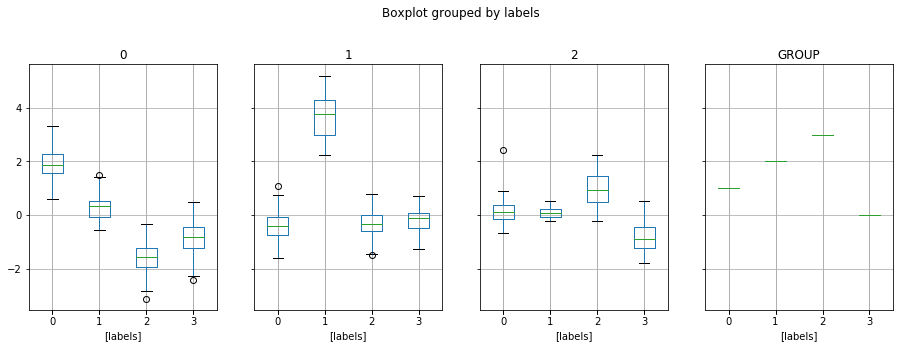

In [510]:
dfXpca2.boxplot(by='labels', layout = (2,4),figsize=(15,10))

In [511]:
dfXpca2['labels'].value_counts()

3    224
0    224
2    162
1     50
Name: labels, dtype: int64

## Observation 
- Hierarchical clustering techniques create clusters in a tree-like structure and any type of distance measure can be used as a measure of similarity. In most cases, techniques either start with individual objects and sequentially combine them (for agglomerative clustering).
- In this context, using agglomerative clustering, individual data points for the attributes were combined using euclidean distance to form four(clusters) or labels that have different characteristics. The four clusters are represented by the labels: 0, 1, 2, & 3 which have different value counts of 224, 50, 162 and 224, respectively.  
- In addition, labeled dataset show overlaps for all the four labels with group 0 data ranked higher in the scale followed by group 1 then group 4 and lastly group 3.  
- Similarly, the pairplot below show some overlaps between the different credit card customers in the dataset showing a similar relationship as the boxplot captured above.  

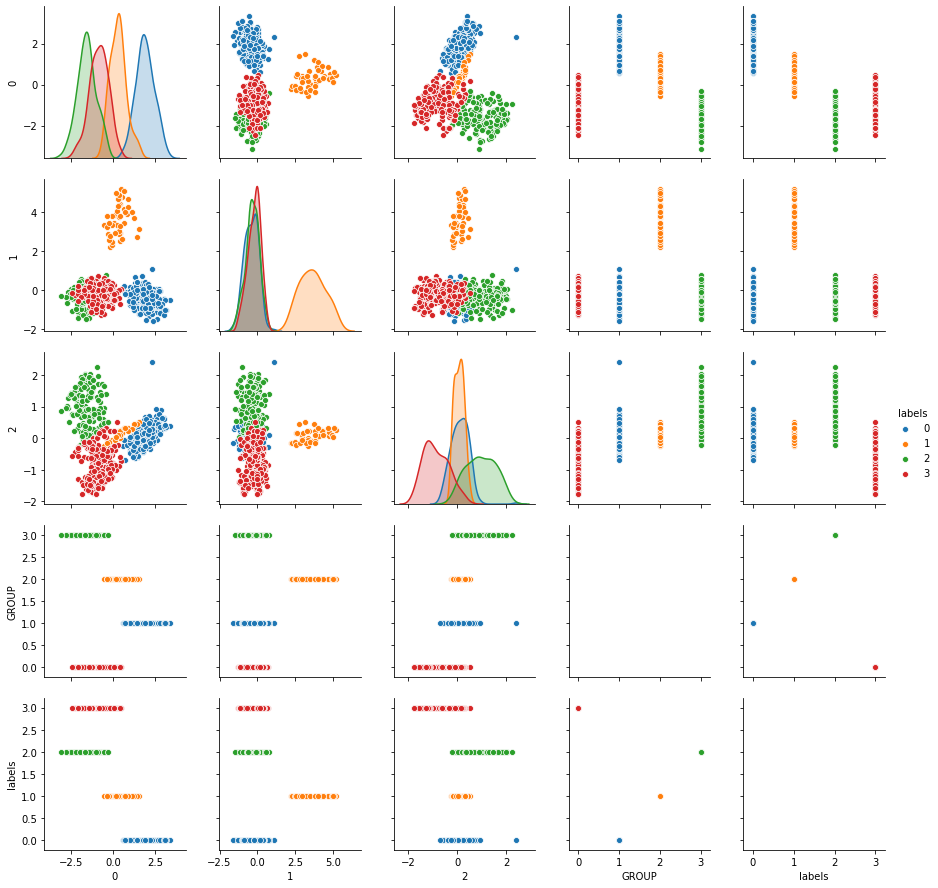

In [512]:
import seaborn as sns
sns.pairplot(dfXpca2, diag_kind='kde', hue='labels')

In [513]:
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage

In [514]:
from scipy.spatial.distance import pdist  #Pairwise distribution between data points

In [515]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering

Z = linkage(dfXpca2, metric='euclidean', method='average')
c, coph_dists = cophenet(Z , pdist(dfXpca2))

c

0.9442837999624581

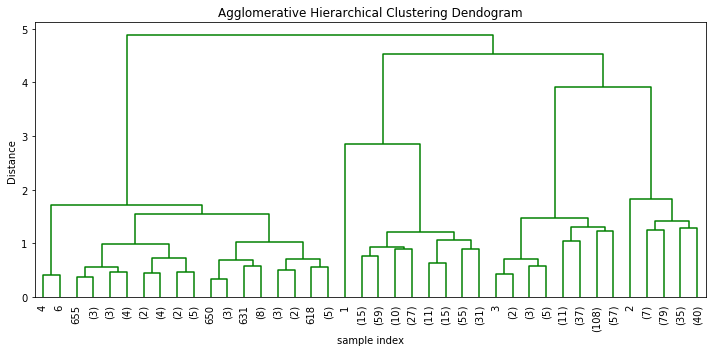

In [516]:
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z,leaf_rotation=90.0,p=5,color_threshold=52,leaf_font_size=10,truncate_mode='level')
plt.tight_layout()

In [517]:
Z = linkage(df3, metric='euclidean', method='complete')
c, coph_dists = cophenet(Z , pdist(dfXpca2))

c

0.819152630349964

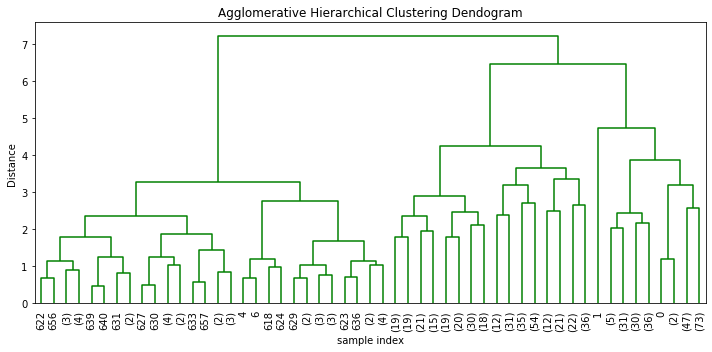

In [518]:
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z,leaf_rotation=90.0,p=5,color_threshold=52,leaf_font_size=10,truncate_mode='level')
plt.tight_layout()

In [519]:
Z = linkage(df3, metric='euclidean', method='ward')
c, coph_dists = cophenet(Z , pdist(dfXpca2))

c

0.8149071963146614

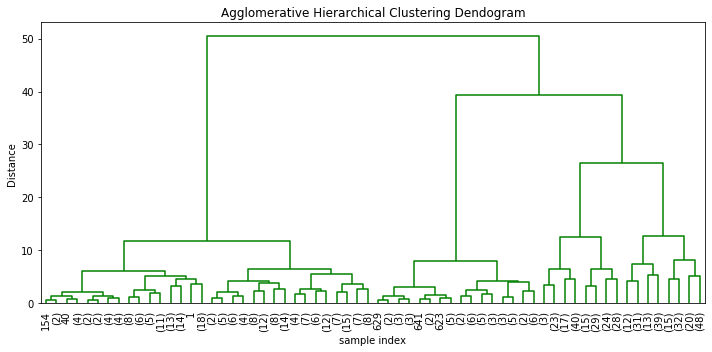

In [520]:
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z,leaf_rotation=90.0,p=5,color_threshold=52,leaf_font_size=10,truncate_mode='level')
plt.tight_layout()

### Observation 
- To explain the level of linkage for agglomerative clustering, the cophenet index was applied as captured above to show how good clustering or segmentation is taking place. As such, the 'average' linkage method performs at 0.94 and hence best performance which means has a better clustering compared to other methods of linkages i.e. complete (0.82) and ward (0.81). 

#### Models Evaluation using Silhouhette Score for K-Means & Agglomerative Clustering (i.e Complete, Average & Ward)

In [529]:
from sklearn.cluster import AgglomerativeClustering 
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn import metrics

In [530]:
from sklearn.cluster import KMeans
k_means = KMeans(n_clusters = 4, random_state=42)
c = k_means.fit(dfXpca2)

In [531]:
agg_comp = AgglomerativeClustering(linkage ='complete', n_clusters=4, affinity='euclidean')
as_comp = agg_comp.fit_predict(dfXpca2)

In [532]:
agg_avg = AgglomerativeClustering(linkage ='average', n_clusters=4, affinity='euclidean')
as_avg = agg_avg.fit_predict(dfXpca2)

In [533]:
agg_ward = AgglomerativeClustering(linkage ='ward', n_clusters=4, affinity='euclidean')
as_ward = agg_ward.fit_predict(dfXpca2)

In [534]:
labels_kmeans = k_means.labels_
labels_comp = agg_comp.labels_
labels_avg = agg_avg.labels_
labels_ward = agg_ward.labels_

In [535]:
print(metrics.silhouette_score(dfXpca2, labels_kmeans))
print(metrics.silhouette_score(dfXpca2, labels_comp)) 
print(metrics.silhouette_score(dfXpca2,labels_avg)) 
print(metrics.silhouette_score(dfXpca2, labels_ward)) 

0.7228910641150027
0.7228910641150027
0.7228910641150027
0.7228910641150027


### Clusters Comparison

- By using both K-means and agglomerative clustering, it is clear that we obtain four (4) clusters for the dataset. Using K-means method, the bend comes out clearly at k = 4 and hence we run K-means clustering using four clusters. - Furthermore, running agglomerative clustering hierarchical method to create dendrogram clusters show that we have four(4) clusters. Using a cophenet index measure to determine the correlation between the distance of points in feature space using the different methods of agglomerative clustering we obtain different cophenet index measures that is: Average (0.94), Complete (0.82) & Ward (0.81). As such, the 'average' linkage method performs at 0.94 and hence best performance which means has a better clustering compared to other methods of linkages i.e. complete (0.82) and ward (0.81).  
- Additionally, doing a model evaluation to compare all these clusters with silhouette score to compare K-means clustering with the different methods of agglomerative clustering (i.e. average, complete & ward), we obtain a score of 0.7230 for all of them. The silhouette score is a measure of how similar an object is to its own cluster compared to other clusters. 
- Hence, we can conclude that both methods of clustering whether K-means and agglomerative clustering performed the same for this dataset irrespective of what linkage method was used for agglomerative clustering. This is because a silhouette score of 0.7230 was obtained for all cases used to segment the data. 

In [528]:
df2Clust = df2.groupby(['GROUP'])
df2Clust.mean()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,labels
GROUP,,,,,,
0,17267.857143,5.464286,3.638393,1.026786,1.937500,3.0
1,12174.107143,2.410714,0.933036,3.553571,6.870536,0.0
2,18000.000000,8.740000,0.600000,10.900000,1.080000,1.0
3,56111.111111,5.586420,3.283951,0.919753,2.086420,2.0


### Analysis the Clusters formed

For this dataset, we can conclude that there are four(4) different segments or clusters of customers and each cluster has a silhouette score of 0.7230 showing to what extent these customers are different. With silhouette score of 72%, we can conclude we have some overlaps within each cluster accounting for the differences within each cluster of about 28%. We have also confirmed these overlaps in the above analysis using boxplots and the above pairplots.  

From the above analysis, the following are my recommendations to the bank on how to better market to and service these customers. 
- Based on the above analysis, it is possible to run personalized marketing campaigns for the four (4) clusters based on the different features of the dataset. These features has helped to identify different segments in the existing customers based on their spending patterns as well as past interaction with the bank. 

- As such, these four groups or labels of customers are expected to respond differently to the marketing campaigns conducted as captured below: 
        - GROUP 2 or Label 1 customers seem to have the highest number of total credit cards and seem to have less visits to the bank and less total calls made on average. However, this group of customers seem to be spending alot of time online on average compared to all the other groups. Hence, the best way to market to these type of customers (GROUP 2 or Label 1) customers is to use digital marketing strategies such as email campaigns to market credit cards to them. Also they seem to have the more credit cards, hence we will be less optimistic in this regard compared to GROUP 1 or label 0 customers. 
        - Group 1 or Label 0 customers seem to have the lowest number of credit cards on average, but with the highest number of calls made on average. They are not very frequent to the bank, but have a moderate presence online compared to the rest of the customers. As a result, I would recommend the bank to use tele-marketing campaigns for these types of customers and a little bit of email marketing. Less efforts should be spent trying to reach these type of customers on site or at the bank since many of these customers don't make alot of visits to the bank. 
        - Group 0 & Group 3 (label 3 and label 2 respectively) seem to have similar behavior based on their data eventhough their average credit limit differ very significantly. These two groups seem to have almost similar number on average  for online activities, number of credit cards, number of visits to the bank, and almost similar number of calls made. This explains why there are some overlaps in the data even after segmentation. The only significant difference is the credit card limit as captured above. Hence, for these type of customers the best marketing strategy will be through customer service at the bank level as they have more bank visits compared to the other two groups of customers. 

### Conclusion
- By using the above case study, the methodology confirms that unsupervised learning is a useful and practical solution in datasets where labeled data is not provided.
- Also for this case study, we can conclude that the application of unsupervised learning techniques and concepts are useful for customer segmentation and learning the best marketing strategies for these market segments based on their different attributes. 

### References: 
1. Great Learning and University of Texas at Austin, Lectures and Case Studies 
2. Scikit-learn Library: https://scikit-learn.org/